In [49]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt 
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from seaborn import heatmap
from pandas.plotting import radviz

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import math as m

In [ ]:
df=pd.read_csv('podgorna.csv',sep=',')
columns_names = df.columns
for i in range(len(columns_names)):
    print(str(i)+' '+str(columns_names[i]))


nazwa_kolumny = 'time'
indeks_kolumny = df.columns.get_loc(nazwa_kolumny)
print("Indeks kolumny", nazwa_kolumny, "to:", indeks_kolumny)

In [84]:
def calculate_fi(variables,dataset):

    df=pd.read_csv('podgorna.csv',sep=',')
    list_of_variables=[]
    
    for var in variables:
        indeks_kolumny = df.columns.get_loc(var)
        list_of_variables.append(indeks_kolumny)

    x=df[columns_names[list_of_variables]]
    y=df[columns_names[4]]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

    print("number of test samples:", x_test.shape[0])
    print("number of training samples:",x_train.shape[0])

    reg_1 = XGBRegressor(booster='gbtree', base_score=0.5, random_state=42,
                                  colsample_bylevel=1, colsample_bytree=1,learning_rate=0.1, max_depth=10, n_estimator=1000,
                                  gamma=0, objective='reg:squarederror', eval_metric='rmse') 

    reg_1.fit(x_train, y_train, eval_set=[(x_test, y_test)], early_stopping_rounds=10, verbose=False)

    print(reg_1.score(x_test,y_test))

    def get_importance(mode):
        importance = reg_1.get_booster().get_score(importance_type=mode)
        total_importance = sum(importance.values())
        normalized_importance = {k: v / total_importance for k, v in importance.items()}
        return normalized_importance
    
    feature_names = x.columns
    feature_importance = reg_1.feature_importances_
    sorted_idx = feature_importance.argsort()[::-1]

    names=[]
    fi_value=[]

    for i in sorted_idx:
        names.append(feature_names[i])
        fi_value.append(feature_importance[i])

    weight_importance=get_importance('weight')
    gain_importance=get_importance('gain')

    feature_importance_data = pd.DataFrame({'feature_importance_weight': weight_importance,'feature_importance_gain': gain_importance})

    
    def create_plot(mode, data=feature_importance_data):
        feature_importance_data_sorted = feature_importance_data.sort_values('feature_importance_{}'.format(mode), ascending=False)
        sns.set_style('darkgrid')
        
        if mode=='gain':
            sns.catplot(x=feature_importance_data_sorted.index, y='feature_importance_{}'.format(mode), data=feature_importance_data_sorted, kind='bar', height=10)
            plt.xlabel('variables',fontsize=15)
            plt.title('Feature importance: {}'.format(mode),fontsize=20)
        else:
           sns.catplot(x=feature_importance_data_sorted.index, y='feature_importance_{}'.format(mode), data=feature_importance_data_sorted, kind='bar', height=10,color='orange')
           plt.xlabel('variables',fontsize=15)
           plt.title('Feature importance: {}'.format(mode),fontsize=20) 
        
        plt.xticks(fontsize=18)
        plt.show()

    create_plot(mode='weight')
    create_plot(mode='gain')

number of test samples: 1940
number of training samples: 7758


c:\Users\slowi\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\slowi\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:160: UserWarning: [23:23:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


0.9982431790355004


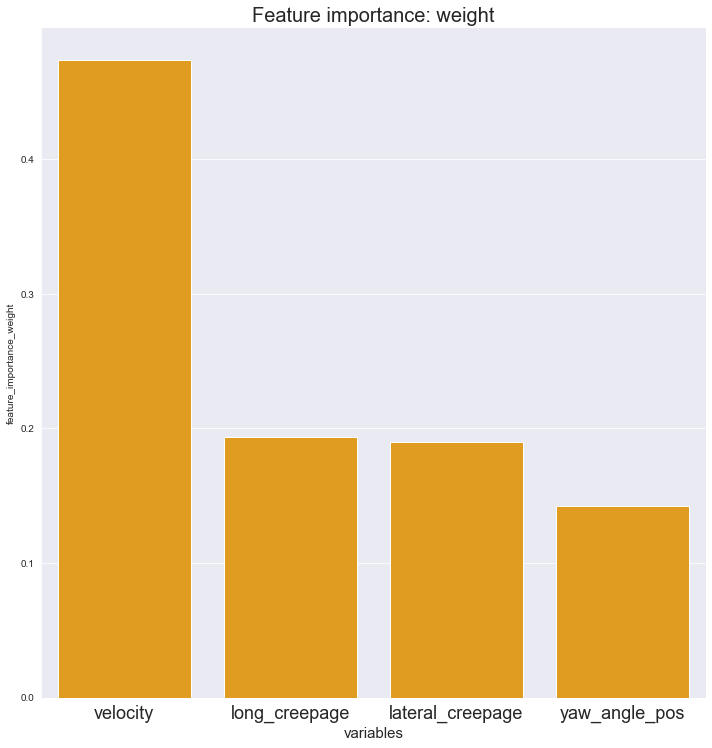

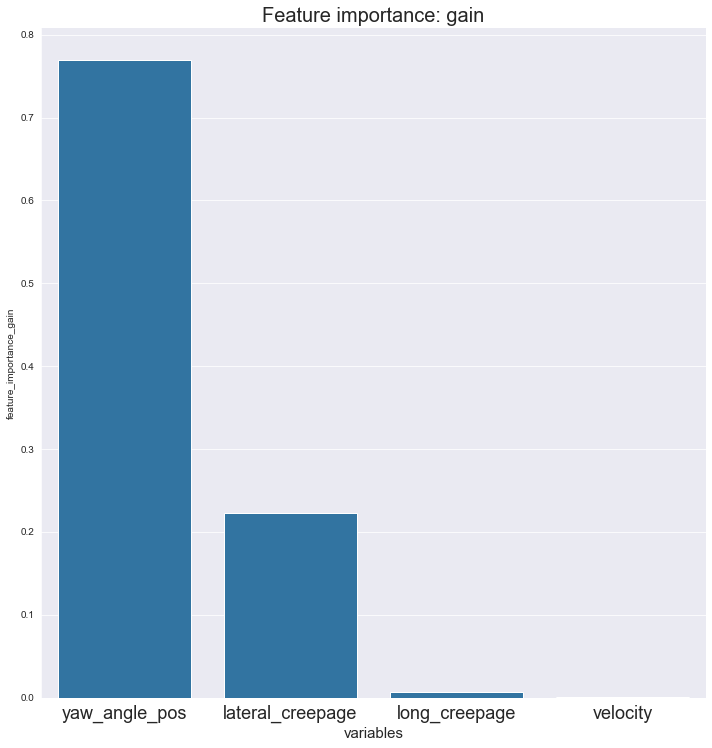

In [89]:
variables=['velocity','lateral_creepage','long_creepage','yaw_angle_pos']
dataset='podgorna.csv'

calculate_fi(variables,dataset)

In [ ]:

w_importance = reg_1.get_booster().get_score(importance_type='weight')
g_importance=reg_1.get_booster().get_score(importance_type='gain')

total_importance_w = sum(w_importance.values())
normalized_importance_w = {k: v / total_importance_w for k, v in w_importance.items()}

total_importance_g = sum(w_importance.values())
normalized_importance_g = {k: v / total_importance_g for k, v in g_importance.items()}


feature_names = x.columns
feature_importance = reg_1.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]

names=[]
fi_value=[]

for i in sorted_idx:
    names.append(feature_names[i])
    fi_value.append(feature_importance[i])

feature_importance_data=pd.DataFrame({'feature_importance: weight':normalized_importance_w,"feature_importance: gain":normalized_importance_g})

feature_importance_data=feature_importance_data.sort_values('feature_importance: weight',ascending=False)

sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.catplot(x=feature_importance_data.index,y=feature_importance_data['feature_importance: weight'], kind='bar',height=10)
plt.show()

feature_importance_data=feature_importance_data.sort_values('feature_importance: gain',ascending=False)

sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.catplot(x=feature_importance_data.index,y=feature_importance_data['feature_importance: gain'], kind='bar',height=10,color='orange')
plt.show()


In [ ]:
feature_names = x.columns
feature_importance = reg_1.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]

names=[]
fi_value=[]

for i in sorted_idx:
    print(f"{feature_names[i]}: {feature_importance[i]}") #gain jako wskaźnik feature importance
    names.append(feature_names[i])
    fi_value.append(feature_importance[i])

feature_importance_data_2=pd.DataFrame({'variable':names,'feature_importance':fi_value})
feature_importance_data_2
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.catplot(x='variable', y='feature_importance', data=feature_importance_data_2, kind='bar',height=10)
plt.show()
